In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df[df['neighbourhood group']== 'brookln']
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)
df.drop(['house_rules','license'],axis=1,inplace=True)

df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)

df.dropna(inplace=True)

df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['Construction year']=df['Construction year'].astype(int)

df['last review']=pd.to_datetime(df['last review'])

df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

df=df.drop(df[df['availability 365']>500].index)

In [ ]:
df.duplicated().value_counts()

,count
False,83389


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


Q1. What are the different property types in the dataset?

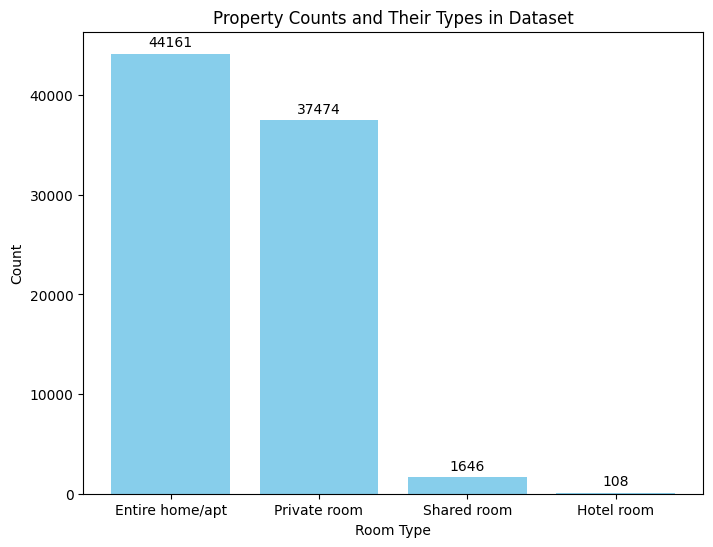

In [ ]:
# What are the different property types in the datasets?
# Get room type counts
property_types = df['room type'].value_counts().to_frame().reset_index()
property_types.columns = ['room type', 'count']
# Room type count plotted on barchart
# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(property_types['room type'], property_types['count'], color="skyblue")

# Add labels on top of bars
ax.bar_label(bars, labels=property_types['count'], padding=3)

# Labels and title
ax.set_xlabel('Room Type')
ax.set_ylabel('Count')
ax.set_title('Property Counts and Their Types in Dataset')

plt.show()

Q2. Which neighborhood group has the highest number of listings?

The neighborhood group with the highest number of listings is 'Brooklyn' with 34622 listings.


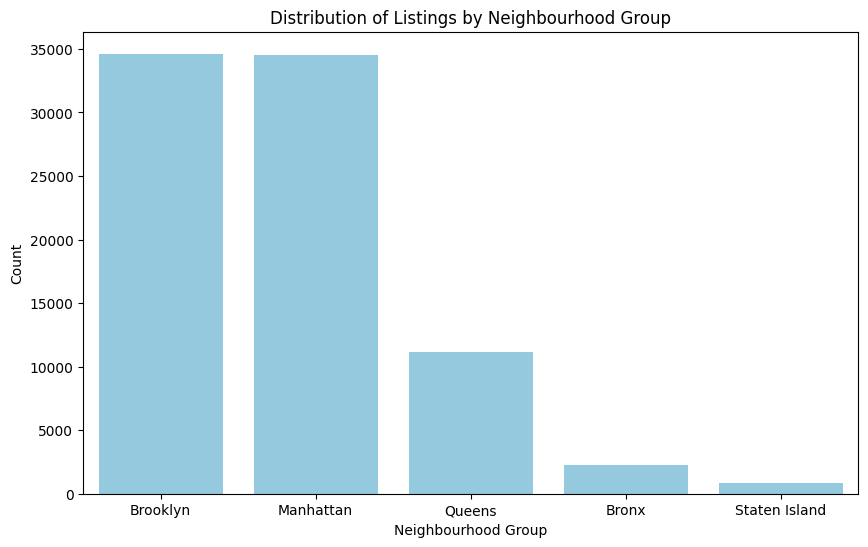

In [ ]:
# Group by 'neighbourhood group' and count the number of listings
neighbourhood_counts = df['neighbourhood group'].value_counts()

# Find the neighborhood group with the highest number of listings
highest_listings_neighbourhood = neighbourhood_counts.idxmax()
highest_listings_count = neighbourhood_counts.max()

print(f"The neighborhood group with the highest number of listings is '{highest_listings_neighbourhood}' with {highest_listings_count} listings.")

plt.figure(figsize=(10, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values ,color="skyblue")
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

Q3. Which neighborhood group has the highest average prices for Airbnb listings?

The neighbourhood group with the highest average price is 'Queens' with an average price of $630.50.


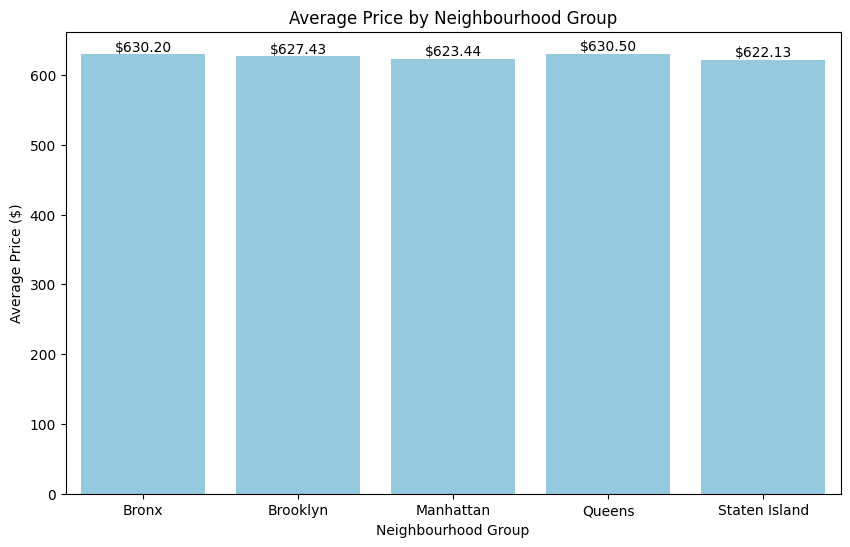

In [ ]:
# Calculate the average price for each neighbourhood group
average_price_by_neighbourhood = df.groupby('neighbourhood group')['price_$'].mean()

# Find the neighbourhood group with the highest average price
highest_avg_price_neighbourhood = average_price_by_neighbourhood.idxmax()
highest_avg_price = average_price_by_neighbourhood.max()

print(f"The neighbourhood group with the highest average price is '{highest_avg_price_neighbourhood}' with an average price of ${highest_avg_price:.2f}.")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_price_by_neighbourhood.index, y=average_price_by_neighbourhood.values,color="skyblue")
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')

# Add values above the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Q4. Is there a relationship between the construction year of property and price?

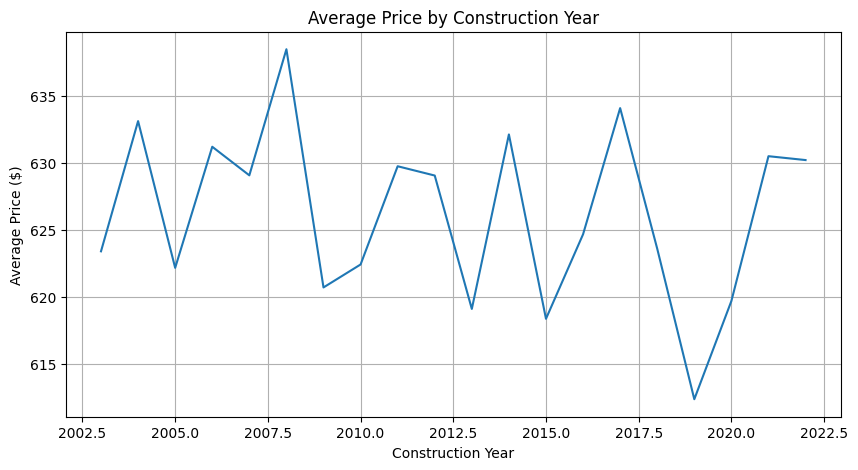

This line plot shows the average price of Airbnb listings for each construction year present in the dataset.
Looking at the plot, it appears that the average price fluctuates year by year, but there isn't a clear strong linear relationship where older or newer properties consistently 
have significantly higher or lower average prices.


In [ ]:
# Group by 'Construction year' and calculate the average price
average_price_by_year = df.groupby('Construction year')['price_$'].mean().reset_index()

# Plot the average price by construction year
plt.figure(figsize=(10, 5))
sns.lineplot(x='Construction year', y='price_$', data=average_price_by_year)
plt.title('Average Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()
print('This line plot shows the average price of Airbnb listings for each construction year present in the dataset.\nLooking at the plot, it appears that the average price fluctuates year by year, but there isn\'t a clear strong linear relationship where older or newer properties consistently \nhave significantly higher or lower average prices.')

Q5. Who are the top 10 hosts by calculated host listing count?

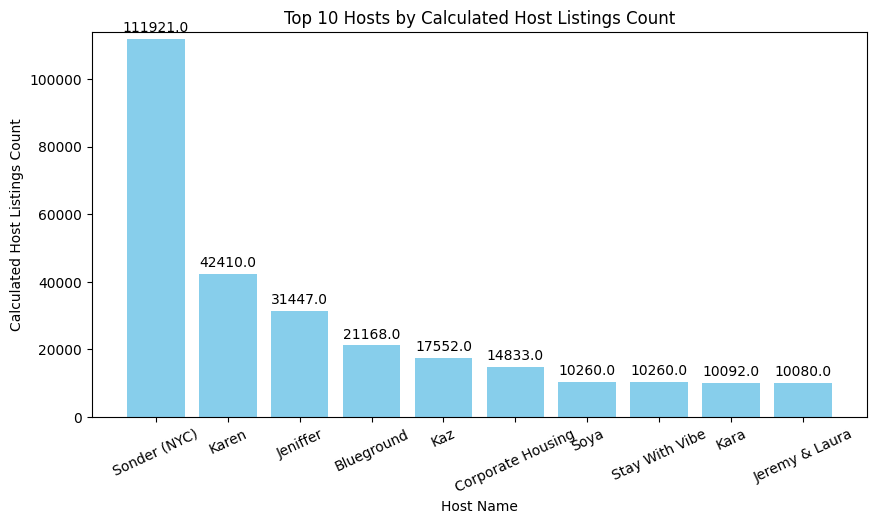

In [ ]:
# Top 10 hosts by calculated host listing count
hosts = (df.groupby('host name')['calculated host listings count'].sum().nlargest(10).reset_index())
# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(hosts['host name'], hosts['calculated host listings count'], color="skyblue")
# Add labels on top of bars
ax.bar_label(bars, labels=hosts['calculated host listings count'], padding=3)
# Labels and title
ax.set_xlabel("Host Name")
ax.set_ylabel("Calculated Host Listings Count")
ax.set_title("Top 10 Hosts by Calculated Host Listings Count")
# Rotate x-axis labels for readability
plt.xticks(rotation=25)
plt.ylim(0, hosts['calculated host listings count'].max() + 2000)
plt.show()

Q6. Are hosts with verified identities more likely to receive positive reviews?

  host_identity_verified  avg_review_rate
0            unconfirmed         3.273325
1               verified         3.284066


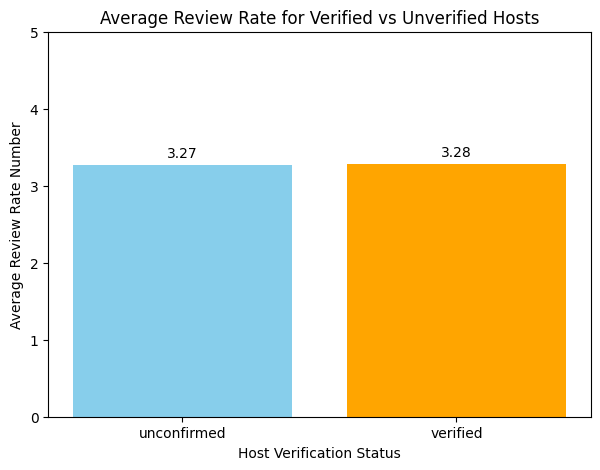

The difference is very small, meaning verification status doesn’t strongly impact review ratings.


In [ ]:
# Group by verification status and compute average review rate
review = (
    df.groupby('host_identity_verified')['review rate number']
    .mean()
    .reset_index()
    .rename(columns={'review rate number': 'avg_review_rate'})
)

print(review)

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(review['host_identity_verified'], review['avg_review_rate'], color=["skyblue", "orange"])

# Add labels above bars
ax.bar_label(bars, labels=[round(val, 2) for val in review['avg_review_rate']], padding=3)

# Axis labels and title
ax.set_xlabel("Host Verification Status")
ax.set_ylabel("Average Review Rate Number")
ax.set_title("Average Review Rate for Verified vs Unverified Hosts")

# Set y-axis limit to make chart clearer
plt.ylim(0, 5)

plt.show()
print('The difference is very small, meaning verification status doesn’t strongly impact review ratings.')

Q7. Is there a correlation between the price of a listing and its service fee?

Correlation between Price and Service Fee: 1.00


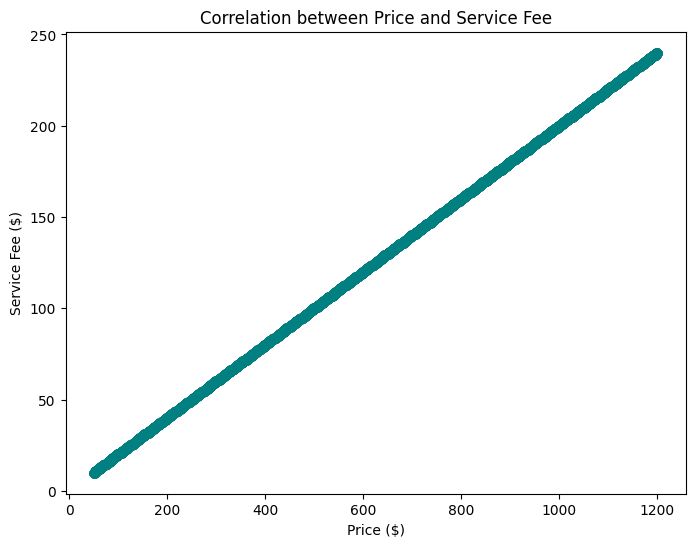

In [ ]:
# Calculate correlation between price and service fee
correlation = df['price_$'].corr(df['service_fee_$'])
print(f"Correlation between Price and Service Fee: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['price_$'], df['service_fee_$'], alpha=0.4, color="teal")
plt.xlabel("Price ($)")
plt.ylabel("Service Fee ($)")
plt.title("Correlation between Price and Service Fee")
plt.show()

Q8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [ ]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

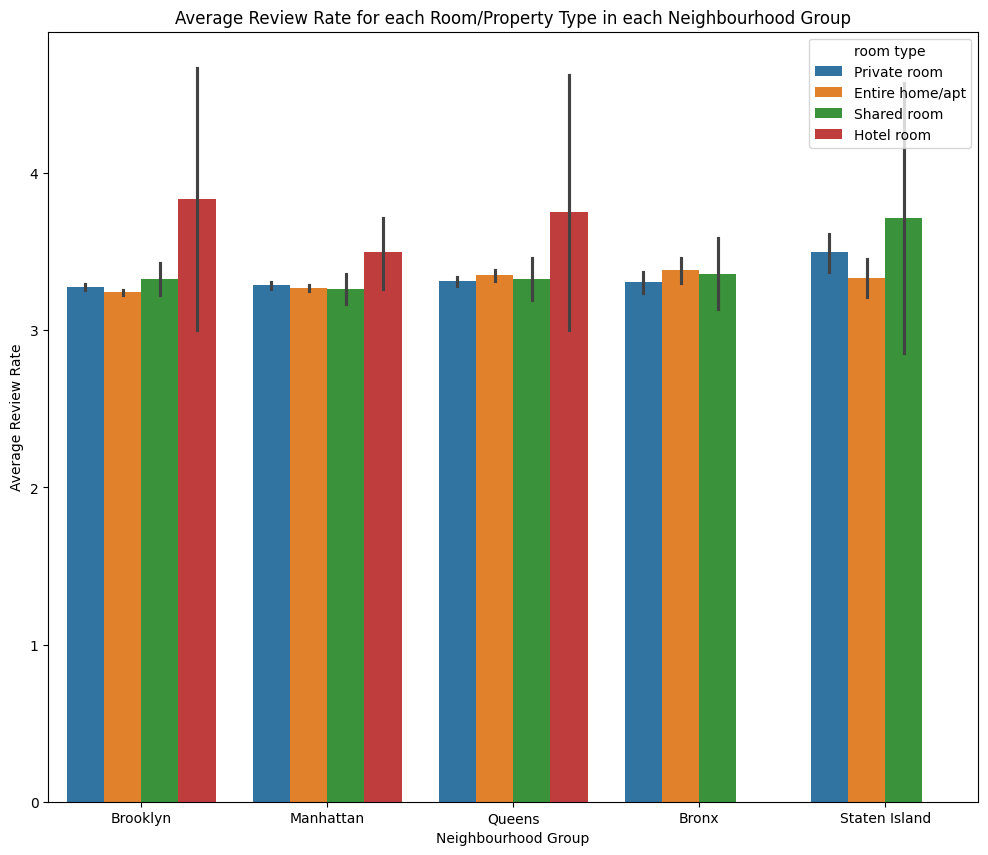

Hotel rooms have the highest review rate compared to all other property types within Brooklyn, Manhattan, and Queens.


In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group')
plt.show()
print("Hotel rooms have the highest review rate compared to all other property types within Brooklyn, Manhattan, and Queens.")

Q9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

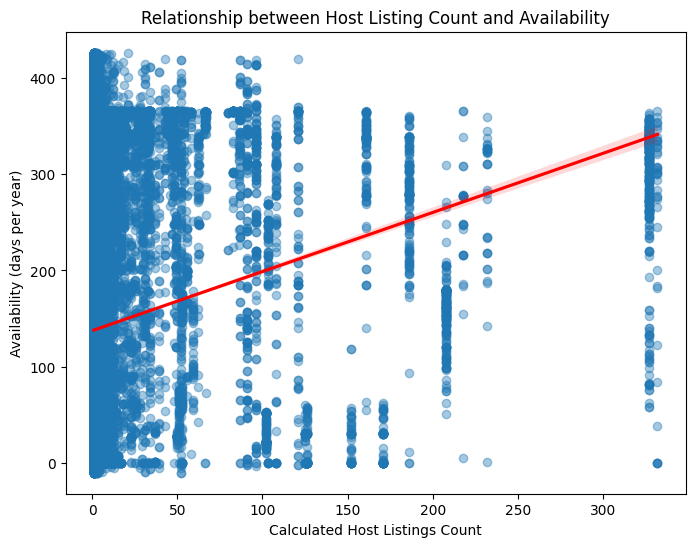

Correlation: 0.136
Result ≈ 0.07 – 0.13, meaning a very weak positive correlation.


In [ ]:
# Regression plot
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='calculated host listings count', y='availability 365', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (days per year)')
plt.title('Relationship between Host Listing Count and Availability')
plt.show()

# Pearson correlation
correlation = df['calculated host listings count'].corr(df['availability 365'])
print(f"Correlation: {correlation:.3f}\nResult ≈ 0.07 – 0.13, meaning a very weak positive correlation.")